<a href="https://colab.research.google.com/github/Mari157mjs/Integraci-n-de-Datos/blob/main/3_Muestreo_LDA_Clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Caso de Estudio**
Describir el caso de estudio y las variables que lo definen.

0. Cargar las librerias de trabajo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# @title 1. Método: Histograma de Frecuencias
# Variables de Entrada: Distribución de las Pérdidas
# Variables de Salida: Limite Inferior, Limite Superior, Número de Datos
# Marca de Clase del Histograma de Frecuencias.
def Histx(LDA): #Nombre de su método

  NC=10  #Número de Clusters

  plt.figure()
  sns.histplot(LDA,kde=True,bins=NC,color='red')
  plt.title('Distribución LDA')
  plt.show()

  #Obtenemos la información de la Distribución
  counts, bin_edges=np.histogram(LDA,bins=NC)
  LI=bin_edges[:-1];LS=bin_edges[1:]
  mc=(LI+LS)/2 #El valor representativo de cada intervalo
  freq=counts/np.sum(counts)

  return LI,LS,counts,mc,freq

2. Se cargan los datos de trabajo

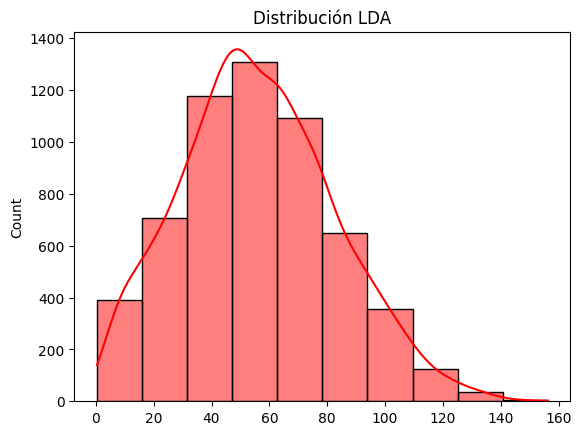

,LI,LS,mc,ND,freq
0,0.388425,15.974978,8.181701,392,0.067100
1,15.974978,31.561531,23.768254,706,0.120849
2,31.561531,47.148084,39.354807,1175,0.201130
3,47.148084,62.734637,54.941360,1307,0.223725
4,62.734637,78.321190,70.527913,1091,0.186751
5,78.321190,93.907743,86.114466,647,0.110750
6,93.907743,109.494295,101.701019,355,0.060767
7,109.494295,125.080848,117.287572,126,0.021568
8,125.080848,140.667401,132.874125,37,0.006333
9,140.667401,156.253954,148.460678,6,0.001027


In [9]:
nxl='/content/drive/MyDrive/Integración de Datos y Pros./6. SolicitantesCrédito(USD).xlsx'
XDB=pd.read_excel(nxl,sheet_name=1)
display(XDB)

#Se calcula la distribución LDA
LDA=XDB.iloc[:,25]*XDB.iloc[:,33]*(1+XDB.iloc[:,35])
XDB['LDA']=LDA

LI,LS,counts,mc,freq=Histx(LDA) #Me saca limites y cuántos datos hay en cada barrita.
df=pd.DataFrame({'LI':LI,'LS':LS,'mc':mc,'ND':counts,'freq':freq})
display(df)
df.to_excel('Histograma_LDA.xlsx')

3. Muestreo Aleatorio - Utilizando el Método de Montecarlo

10000


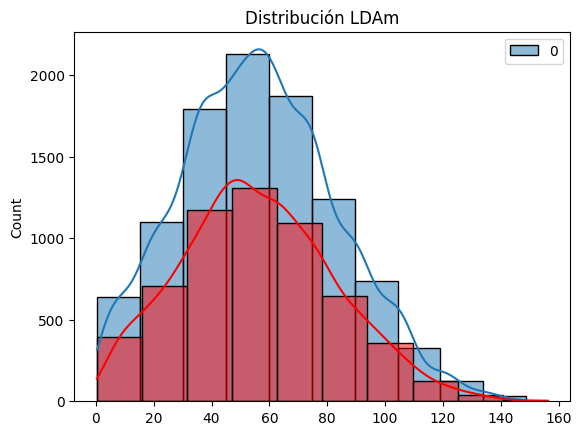

In [40]:
acum=np.cumsum(freq)
Confiabilidad=9999+1 #Confiabilidad del 99,99%
print(Confiabilidad)
LDAm=np.zeros((Confiabilidad,1)) #La variable muestreada

for k in range(Confiabilidad):
  al=np.random.uniform(0,1) #Esto es uno cualquiera
  inter=np.where(al<=acum)[0][0]
  #print("Limite inferior:",LI[inter])
  #print("Limite superior:",LS[inter])
  LDAm[k]=np.random.uniform(LI[inter],LS[inter])
  #print("El número seleccionado es:",LDAm[k,])

plt.figure()
sns.histplot(LDAm,kde=True,bins=10,color='pink')
sns.histplot(LDA,kde=True,bins=10,color='red')
plt.title('Distribución LDAm')
plt.show()

4. Prueba del muestreo

In [41]:
from scipy.stats import skew,kurtosis

print("Información LDA original")
print("La media es:",np.mean(LDA))
print("La varianza es:",np.var(LDA))
print("El coeficiente de asimetría es:",skew(LDA))
print("El coeficiente de curtosis es:",kurtosis(LDA))

print("Información LDA original")
print("La media es:",np.mean(LDAm))
print("La varianza es:",np.var(LDAm))
print("El coeficiente de asimetría es:",skew(LDAm))
print("El coeficiente de curtosis es:",kurtosis(LDAm))

#Las diferenecias entre las metricas son
dif_u=(np.mean(LDA)-np.mean(LDAm))/np.mean(LDA)
print("La diferencia porcentual de la media es:",dif_u*100)
dif_v=(np.var(LDA)-np.var(LDAm))/np.var(LDA)
print("La diferencia porcentual de la varianza es:",dif_v*100)
dif_sk=(skew(LDA)-skew(LDAm))/skew(LDA)
print("La diferencia porcentual del coeficiente de asimetría es:",dif_sk*100)
dif_ku=(kurtosis(LDA)-kurtosis(LDAm))/kurtosis(LDA)
print("La diferencia porcentual del coeficiente de curtosis es:",dif_ku*100)

Información LDA original
La media es: 56.05296470592385
La varianza es: 714.3667152538843
El coeficiente de asimetría es: 0.28830609042395505
El coeficiente de curtosis es: -0.2302352715704683
Información LDA original
La media es: 56.18193628746293
La varianza es: 738.939717033351
El coeficiente de asimetría es: [0.24280606]
El coeficiente de curtosis es: [-0.29064597]
La diferencia porcentual de la media es: -0.23008877802578281
La diferencia porcentual de la varianza es: -3.4398301677218446
La diferencia porcentual del coeficiente de asimetría es: [15.78184847]
La diferencia porcentual del coeficiente de curtosis es: [-26.23868223]


**Análisis de Resultados**

De acuerdo con el muestreo aleatorio, se puede observar que a medida
que la confiabilidad de los datos va en aumento, las métricas estadísticas
de tendecia central tienden a tener comportamiento similares a las métricas de tendencia central de la variable de referencia. Esto se puede corroborar a partir de las diferencias entre dichas métricas, se puede observar que la media y el coeficiente de asiemtría lograron diferencias por debajo del 1% en promedio (media, coeficiente de asimetría), mientras que el coeficiente de
kurtosis, y la varianza lograron diferencias cercanas al 7% en promedio, lo
que es aceptable frente a este tipo de procesos de integración de datos.